*The Extinction Status of Psittaciformes*
================
**This file analyzes the Extinction Status of the order of Psittaciformes (Parrots)**


Research Question:

Investigate if there's a correlation between the physical characteristics of bird species, their natural environments, and their conservation status.

What roles do geographical locations play in the conservation status of bird species?

What roles do geographical locations play in the morphological traits of bird species?

Is there is a relationship between morphological traits and conservation status of bird species?

In [20]:
pip install geopandas matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


In [22]:
df = pd.read_csv('./dataset/Psittaciformes.csv',
                 on_bad_lines='skip',
                 encoding='utf-8',
                 dtype=str,  # Read all as string first
                 skip_blank_lines=True,
                 header=0,
                 skipinitialspace=True)

In [23]:
print(df.columns)

Index(['scientificName', 'kingdomName', 'phylumName', 'className', 'orderName',
       'familyName', 'genusName', 'speciesName', 'redlistCategory',
       'redlistCriteria', 'yearPublished', 'assessmentDate', 'criteriaVersion',
       'language', 'populationTrend', 'systems', 'realm', 'yearLastSeen',
       'possiblyExtinct', 'possiblyExtinctInTheWild', 'scopes', 'Sequence',
       'Avibase.ID1', 'Total.individuals', 'Female', 'Male', 'Unknown',
       'Complete.measures', 'Beak.Length_Culmen', 'Beak.Length_Nares',
       'Beak.Width', 'Beak.Depth', 'Tarsus.Length', 'Wing.Length',
       'Kipps.Distance', 'Secondary1', 'Hand-Wing.Index', 'Tail.Length',
       'Mass', 'Mass.Source', 'Mass.Refs.Other', 'Inference',
       'Traits.inferred', 'Reference.species', 'Habitat', 'Habitat.Density',
       'Migration', 'Trophic.Level', 'Trophic.Niche', 'Primary.Lifestyle',
       'Min.Latitude', 'Max.Latitude', 'Centroid.Latitude',
       'Centroid.Longitude', 'Range.Size', 'internalTaxonId_x', '

In [24]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(df['redlistCategory'].unique())

['Endangered' 'Least Concern' 'Near Threatened' 'Vulnerable'
 'Critically Endangered' 'Extinct in the Wild']


In [62]:
print(df['possiblyExtinct'].unique())
print(df['Centroid.Longitude'].unique())


['FALSE' 'TRUE']
['126.78' '125.22' '124.74' '-172.41' '167.39' '126.54' '25.5' '108.17'
 '125.54' '80.73' '-52.74' '-48.58' '-58.18' '-44.26' '-40.6' '-48.65'
 '-67.7' '-71.96' '-64.3' '-77.46' '-55.72' '125.04' '-70.31' '46.7'
 '-87.25' '-54.09' '-90.24' '160.25' '-66' '-78.61' '-59.66' '126.36'
 '87.11' '121.15' '127.97' '120.81' '-48.04' '142.61' '-41.54' '-47.86'
 '-42.36' '24.33' '170.31' '120.06' '171.84' '146.62' '142.3' '142.94'
 '140.9' '157.95' '138.95' '121.33' '19.53' '-64.83' '-61.89' '-52.56'
 '-77.34' '-50.6' '147.61' '171.92' '145.83' '46.69' '134.86' '128.72'
 '134.93' '136.73' '16.11' '35.62' '32.72' '-60.82' '-58.48' '-61.48'
 '-92.69' '-64.37' '-58.9' '-52.53' '149.01' '-84.94' '154.27' '148.07'
 '-139.55' '134.6' '122.9' '158.98' '132.9' '-59.05' '-67.37' '142.31'
 '147.25' '-38.91' '-60.62' '-97.21' '-66.83' '-89' '-90.11' '-87.5'
 '-75.49' '-82.15' '-84.04' '-83.02' '131.29' '93.79' '-99.08' nan '57.47'
 '-74.31' '18.71' '-52.1' '-70.48' '141.96' '131.44' '119.9

In [26]:
print(df['redlistCriteria'])

0                       B1ab(i,ii,iii,iv,v)
1                                       NaN
2                                  B1b(iii)
3                                       NaN
4               B1b(iii,v)c(ii,iii); C2a(i)
5                                       NaN
6                                   C2a(ii)
7                                       NaN
8                                 B1ab(iii)
9                                       NaN
10                            A2cd; C2a(ii)
11                         A2cd+3cd+4cd; C1
12                                      NaN
13                                      NaN
14     A2cd+3cd+4cd;B1ab(i,ii,iii,v);C2a(i)
15                                      NaN
16                                      NaN
17                                      NaN
18                                      NaN
19                                      NaN
20                                      NaN
21                                      NaN
22                              

In [27]:
print(df['Habitat'].unique())

['Forest' 'Woodland' 'Grassland' 'Shrubland' 'Human Modified' nan 'Desert']


In [28]:
print(df['threats'].unique())
df['threats'].to_csv('threats.csv', index=False)


['Trade represents a significant and on-going threat to the species. It was widely trapped as early as the 19th century. In 1999, research suggested that as many as 1,000-2,000 birds were being taken from Karakelang each year, 80% (illegally) to the Philippines. This is compounded by the extensive loss of forest, perhaps the main factor underlying its disappearance from Sangihe. The reasons behind habitat loss are small-holder agricultural encroachment into primary forest and (illegal) commercial logging. Furthermore, in 2003 there were plans to develop a commercial banana plantation on Karakelang <strong></strong>(Riley 2003). The use of insecticides and the transmission of disease via escaped cage-birds to wild populations, have been identified as a further potential hazards. <p></p>'
 nan
 'Its preferred habitat is relatively unlikely to be affected by human activities in the medium term, but logging and trapping must remain a concern. As a species of montane areas, it is potentiall

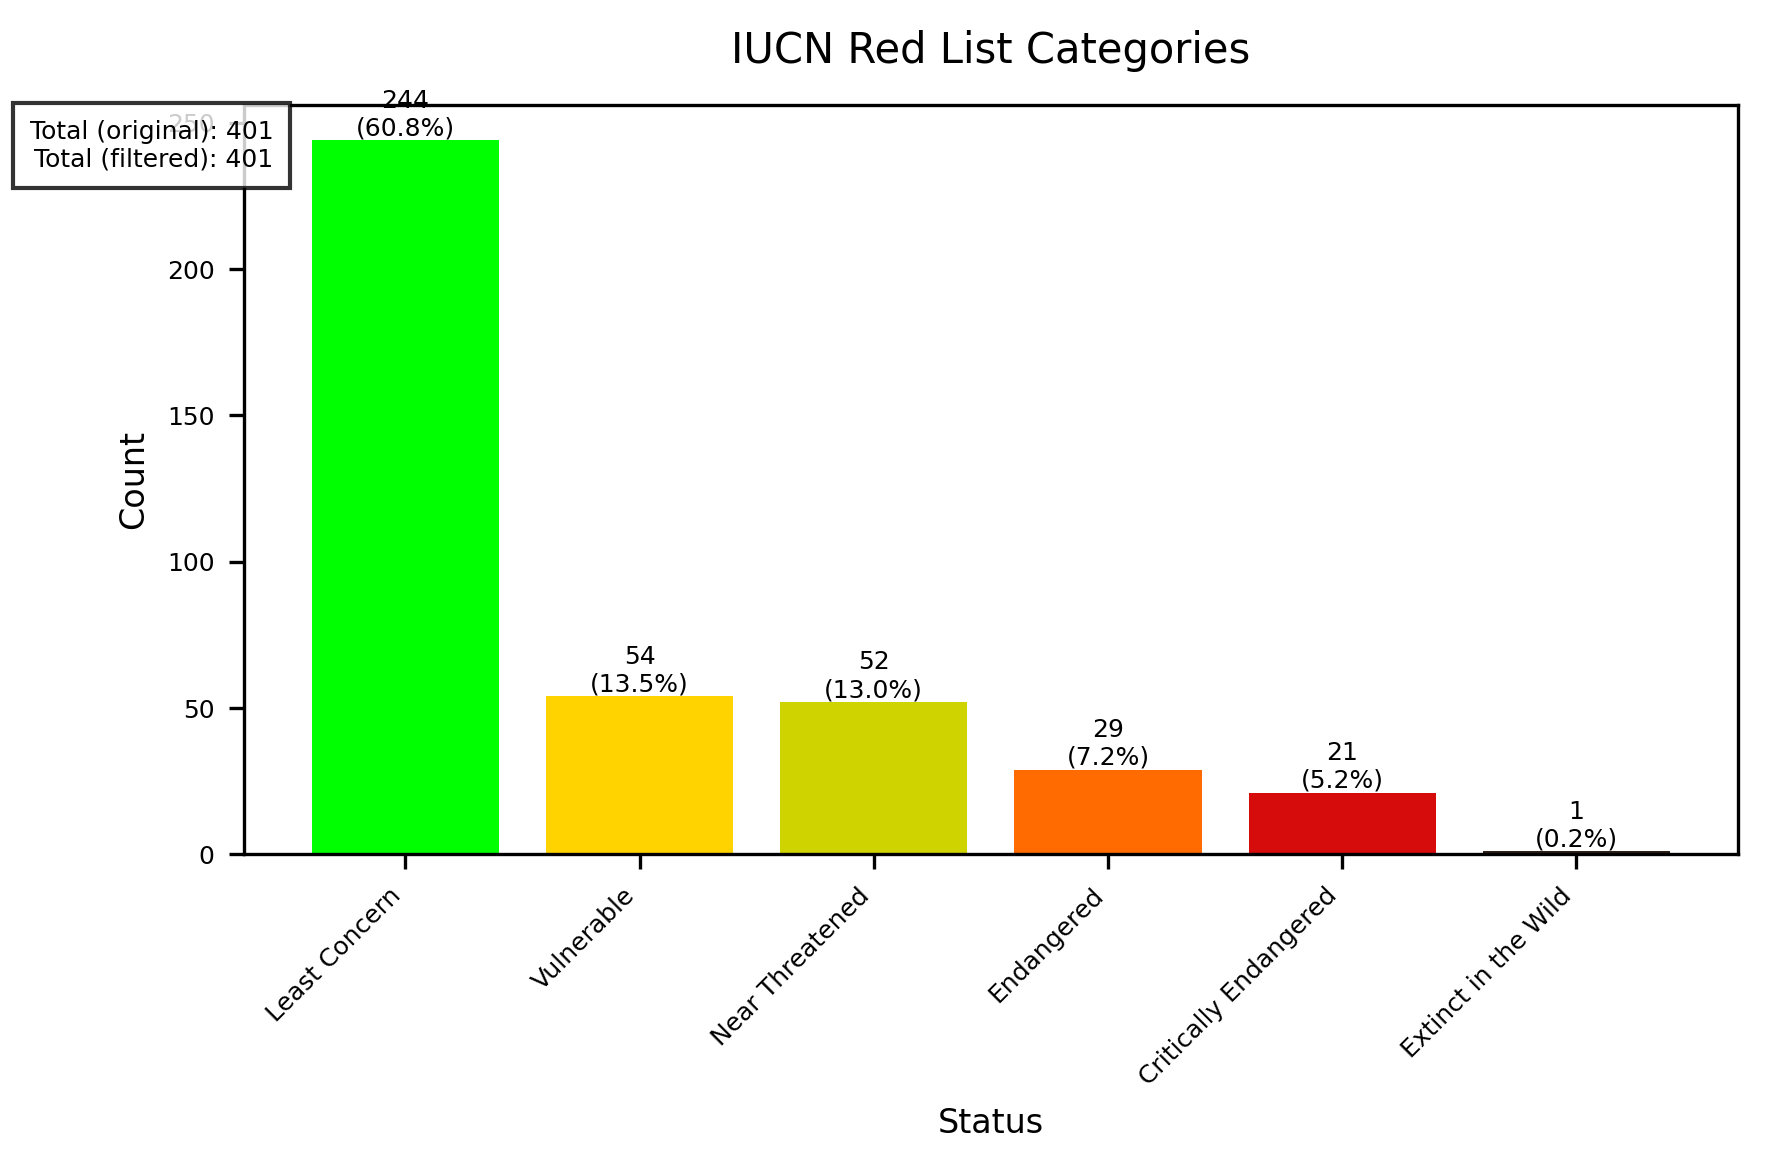

In [29]:
def plot_redlist_distribution(df, figsize=(6, 4), dpi=300):
    """
    Creates a histogram/distribution plot of Red List categories with smaller dimensions
    """
    # Define valid categories and filter
    valid_categories = [
        'Least Concern',
        'Vulnerable',
        'Endangered',
        'Critically Endangered',
        'Extinct in the Wild',
        'Near Threatened',
        'Extinct'
    ]

    df_filtered = df[df['redlistCategory'].isin(valid_categories)]

    # Define IUCN Red List colors
    colors = {
        'Least Concern': '#00FF00',        # Green
        'Vulnerable': '#FFD300',# Yellow
        'Near Threatened': '#CFD300',
        'Endangered': '#FF6B00',           # Orange
        'Critically Endangered': '#D60B0B', # Red
        'Extinct in the Wild': '#2D1F15',  # Dark Brown
        'Extinct': '#000000',              # Black
    }

    # Calculate value counts and percentages
    counts = df_filtered['redlistCategory'].value_counts()
    total_filtered = len(df_filtered)
    total_original = len(df)

    # Create figure with smaller size
    plt.figure(figsize=figsize, dpi=dpi)

    # Create bar plot
    bars = plt.bar(range(len(counts)), counts,
                  color=[colors.get(x, '#808080') for x in counts.index])

    # Customize plot with smaller font sizes
    plt.title('IUCN Red List Categories', pad=10, fontsize=10)
    plt.xlabel('Status', fontsize=8)
    plt.ylabel('Count', fontsize=8)

    # Rotate x-axis labels with smaller font
    plt.xticks(range(len(counts)), counts.index, rotation=45, ha='right', fontsize=6)
    plt.yticks(fontsize=6)

    # Add count labels with smaller font
    for bar in bars:
        height = bar.get_height()
        percentage = (height/total_filtered) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({percentage:.1f}%)',
                ha='center', va='bottom', fontsize=6)

    # Add both totals to upper right
    plt.text(0.02, 0.98,
             f'Total (original): {total_original:,}\nTotal (filtered): {total_filtered:,}',
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8),
             verticalalignment='top',
             horizontalalignment='right',
             fontsize=6)

    plt.tight_layout()

    return plt.gcf()

# Usage:
fig = plot_redlist_distribution(df)
plt.show()


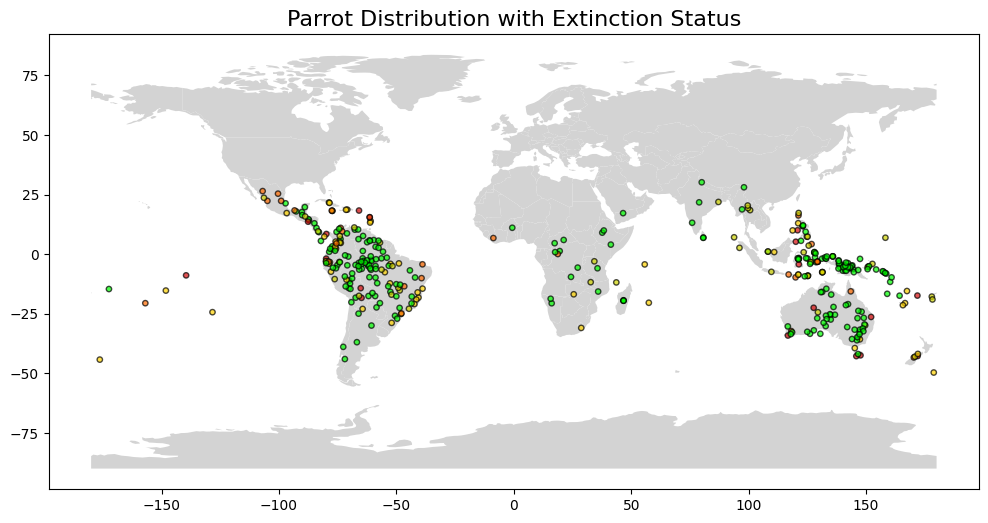

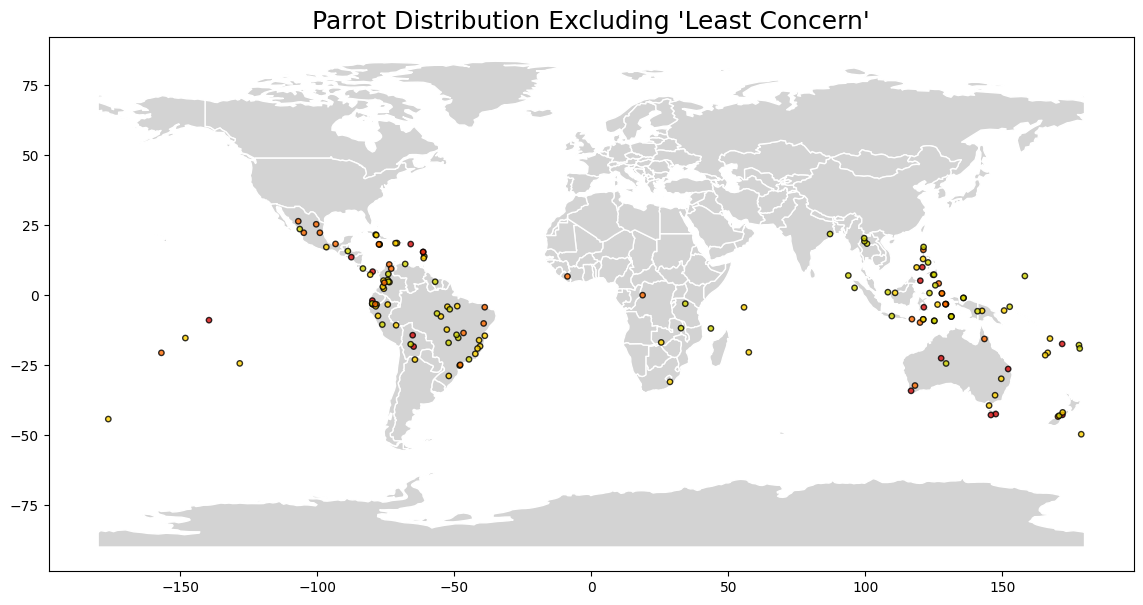

In [30]:
# Replace this path with the location of your downloaded Natural Earth shapefile
world_shapefile_path = "./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Load the world shapefile
world = gpd.read_file(world_shapefile_path)

# Filter relevant columns for the map
columns_needed = ['scientificName', 'Centroid.Latitude', 'Centroid.Longitude', 'redlistCategory']
map_data = df[columns_needed].dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Assign colors based on 'redlistCategory'
map_data['color'] = map_data['redlistCategory'].map(colors)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    map_data, 
    geometry=gpd.points_from_xy(map_data['Centroid.Longitude'], map_data['Centroid.Latitude']),
    crs="EPSG:4326"
)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgrey')

gdf.plot(ax=ax, color=gdf['color'], markersize=15, edgecolor='black', alpha=0.7)

# Add title
plt.title("Parrot Distribution with Extinction Status", fontsize=16)
plt.show()

# Exclude rows where 'redlistCategory' is 'Least Concern'
map_data = map_data[map_data['redlistCategory'] != 'Least Concern']

# Assign colors based on 'redlistCategory'
map_data['color'] = map_data['redlistCategory'].map(colors)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    map_data, 
    geometry=gpd.points_from_xy(map_data['Centroid.Longitude'], map_data['Centroid.Latitude']),
    crs="EPSG:4326"
)

# Plot the map
fig, ax = plt.subplots(figsize=(14, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='white')

gdf.plot(ax=ax, color=gdf['color'], markersize=15, edgecolor='black', alpha=0.8)

# Add title
plt.title("Parrot Distribution Excluding 'Least Concern'", fontsize=18)
plt.show()


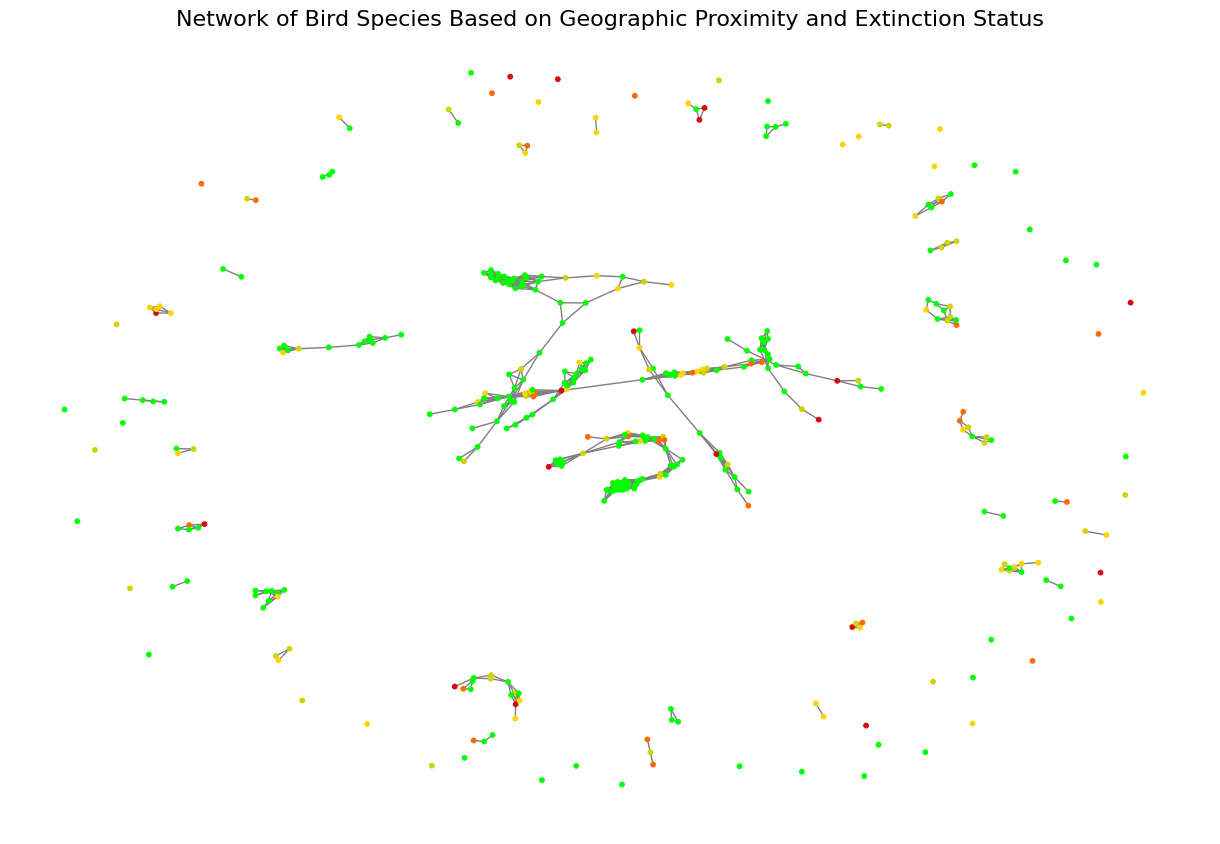

In [31]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Filter relevant columns and convert latitude/longitude to numeric
columns_needed = ['scientificName', 'Centroid.Latitude', 'Centroid.Longitude', 'redlistCategory']
network_data = df[columns_needed].dropna()

network_data['Centroid.Latitude'] = pd.to_numeric(network_data['Centroid.Latitude'], errors='coerce')
network_data['Centroid.Longitude'] = pd.to_numeric(network_data['Centroid.Longitude'], errors='coerce')

# Drop rows with NaN values after conversion
network_data = network_data.dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Initialize graph
G = nx.Graph()

# Add nodes for each bird with color based on extinction status
for _, row in network_data.iterrows():
    G.add_node(row['scientificName'], color=colors[row['redlistCategory']])

# Add edges based on geographic proximity (difference in latitude and longitude < 10)
for i, row1 in network_data.iterrows():
    for j, row2 in network_data.iterrows():
        if i < j:  # Avoid duplicate comparisons and self-loops
            lat_diff = abs(row1['Centroid.Latitude'] - row2['Centroid.Latitude'])
            lon_diff = abs(row1['Centroid.Longitude'] - row2['Centroid.Longitude'])
            if lat_diff < 3 and lon_diff < 3:
                G.add_edge(row1['scientificName'], row2['scientificName'])

# Visualize the network
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
pos = nx.spring_layout(G)  # Compute layout for visualization

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', font_size=10, font_weight='bold', node_size=10)
plt.title("Network of Bird Species Based on Geographic Proximity and Extinction Status", fontsize=16)
plt.show()


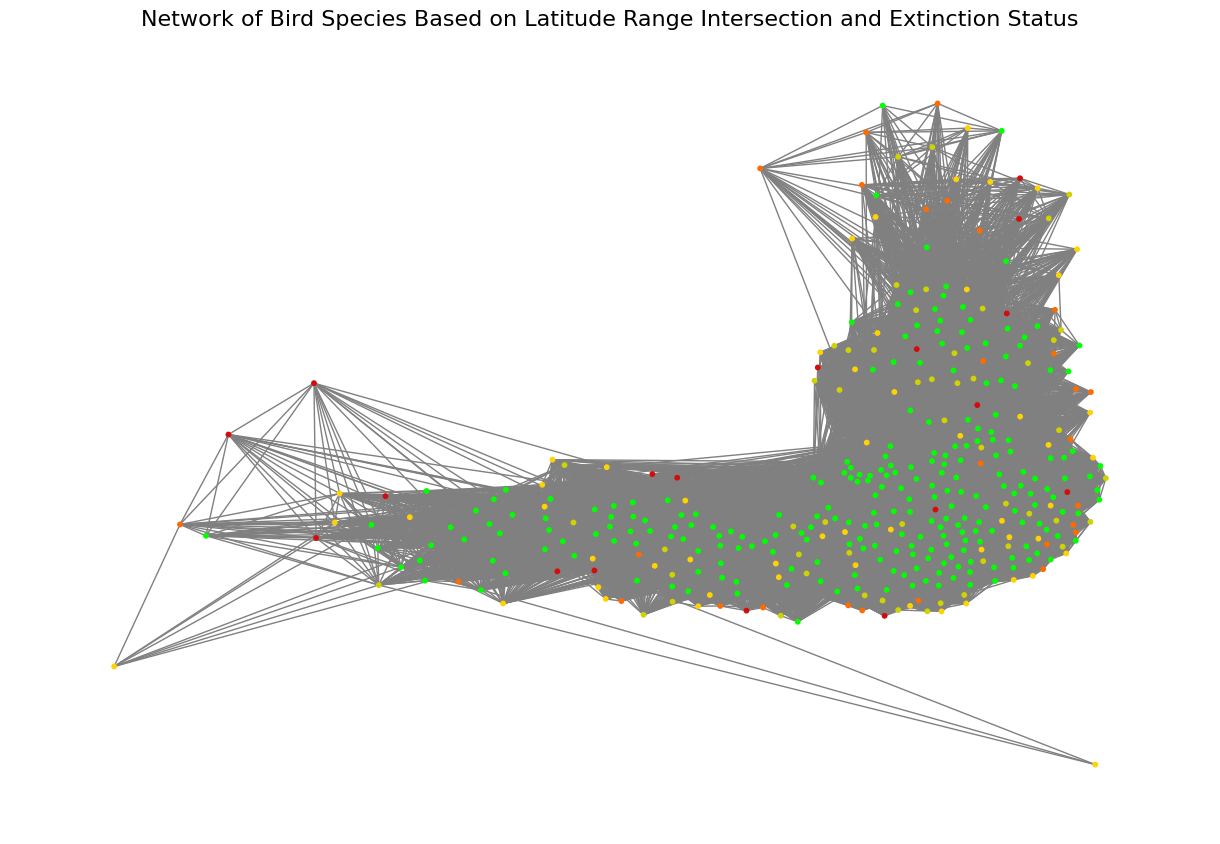

In [49]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Filter relevant columns and convert latitude values to numeric
columns_needed = ['scientificName', 'Min.Latitude', 'Max.Latitude', 'redlistCategory']
network_data = df[columns_needed].dropna()

network_data['Min.Latitude'] = pd.to_numeric(network_data['Min.Latitude'], errors='coerce')
network_data['Max.Latitude'] = pd.to_numeric(network_data['Max.Latitude'], errors='coerce')

# Drop rows with NaN values after conversion
network_data = network_data.dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Initialize graph
G = nx.Graph()

# Add nodes for each bird with color based on extinction status
for _, row in network_data.iterrows():
    G.add_node(row['scientificName'], color=colors[row['redlistCategory']])

# Add edges if latitude ranges intersect
for i, row1 in network_data.iterrows():
    for j, row2 in network_data.iterrows():
        if i < j:  # Avoid duplicate comparisons and self-loops
            # Check for intersection in latitude ranges
            if not (row1['Max.Latitude'] < row2['Min.Latitude'] or row1['Min.Latitude'] > row2['Max.Latitude']):
                G.add_edge(row1['scientificName'], row2['scientificName'])

# Visualize the network
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
pos = nx.spring_layout(G, k=0.8, iterations=100)  # Compute layout for visualization

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', font_size=10, font_weight='bold', node_size=10)
plt.title("Network of Bird Species Based on Latitude Range Intersection and Extinction Status", fontsize=16)
plt.show()


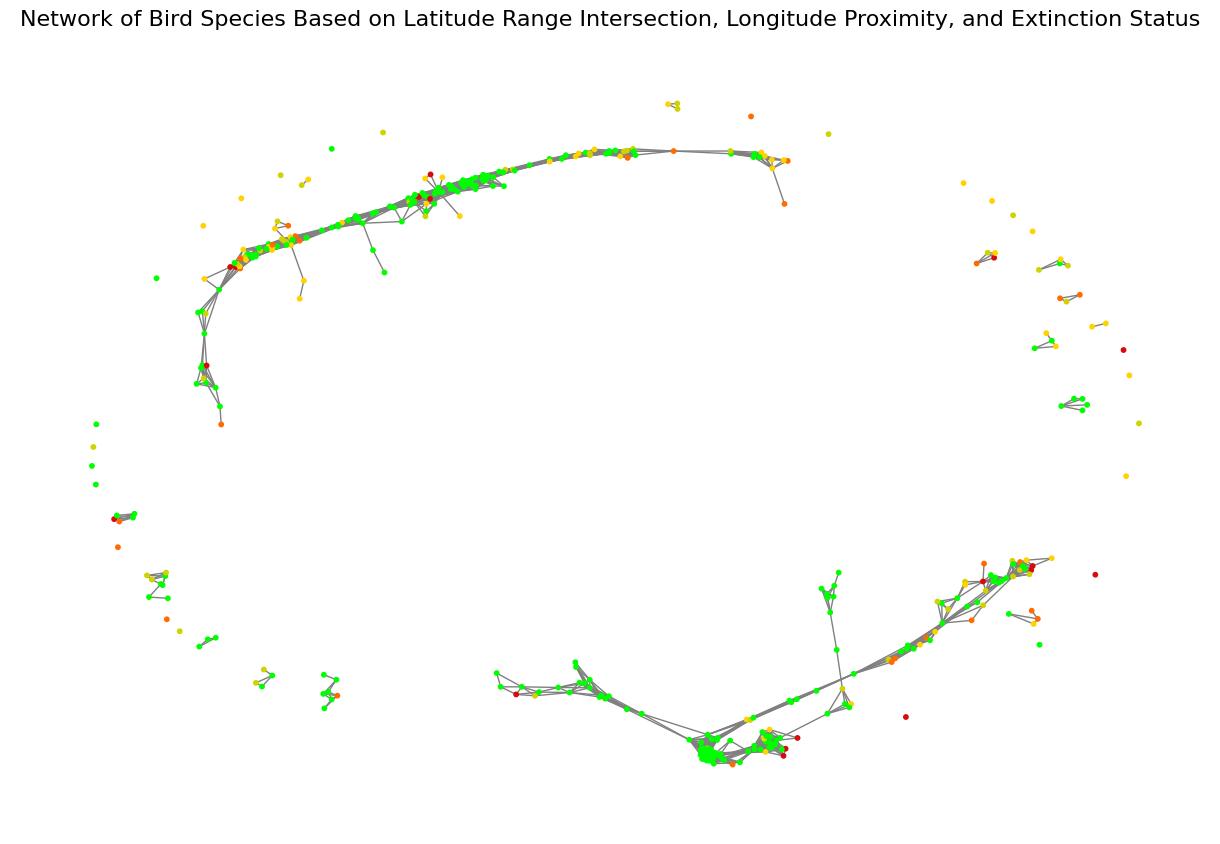

In [61]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Filter relevant columns and convert latitude and longitude values to numeric
columns_needed = ['scientificName', 'Min.Latitude', 'Max.Latitude', 'Centroid.Longitude', 'redlistCategory']
network_data = df[columns_needed].dropna()

network_data['Min.Latitude'] = pd.to_numeric(network_data['Min.Latitude'], errors='coerce')
network_data['Max.Latitude'] = pd.to_numeric(network_data['Max.Latitude'], errors='coerce')
network_data['Centroid.Longitude'] = pd.to_numeric(network_data['Centroid.Longitude'], errors='coerce')

# Drop rows with NaN values after conversion
network_data = network_data.dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Initialize graph
G = nx.Graph()

# Add nodes for each bird with color based on extinction status
for _, row in network_data.iterrows():
    G.add_node(row['scientificName'], color=colors[row['redlistCategory']])

# Add edges if latitude ranges intersect and longitude difference is less than 3
for i, row1 in network_data.iterrows():
    for j, row2 in network_data.iterrows():
        if i < j:  # Avoid duplicate comparisons and self-loops
            # Check for intersection in latitude ranges
            lat_intersects = not (row1['Max.Latitude'] < row2['Min.Latitude'] or row1['Min.Latitude'] > row2['Max.Latitude'])
            lon_diff = abs(row1['Centroid.Longitude'] - row2['Centroid.Longitude'])
            if lat_intersects and lon_diff < 3:
                G.add_edge(row1['scientificName'], row2['scientificName'])

# Visualize the network
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
pos = nx.spring_layout(G, k=1.5, iterations=1500)  # Compute layout for visualization

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', font_size=10, font_weight='bold', node_size=10)
plt.title("Network of Bird Species Based on Latitude Range Intersection, Longitude Proximity, and Extinction Status", fontsize=16)
plt.show()


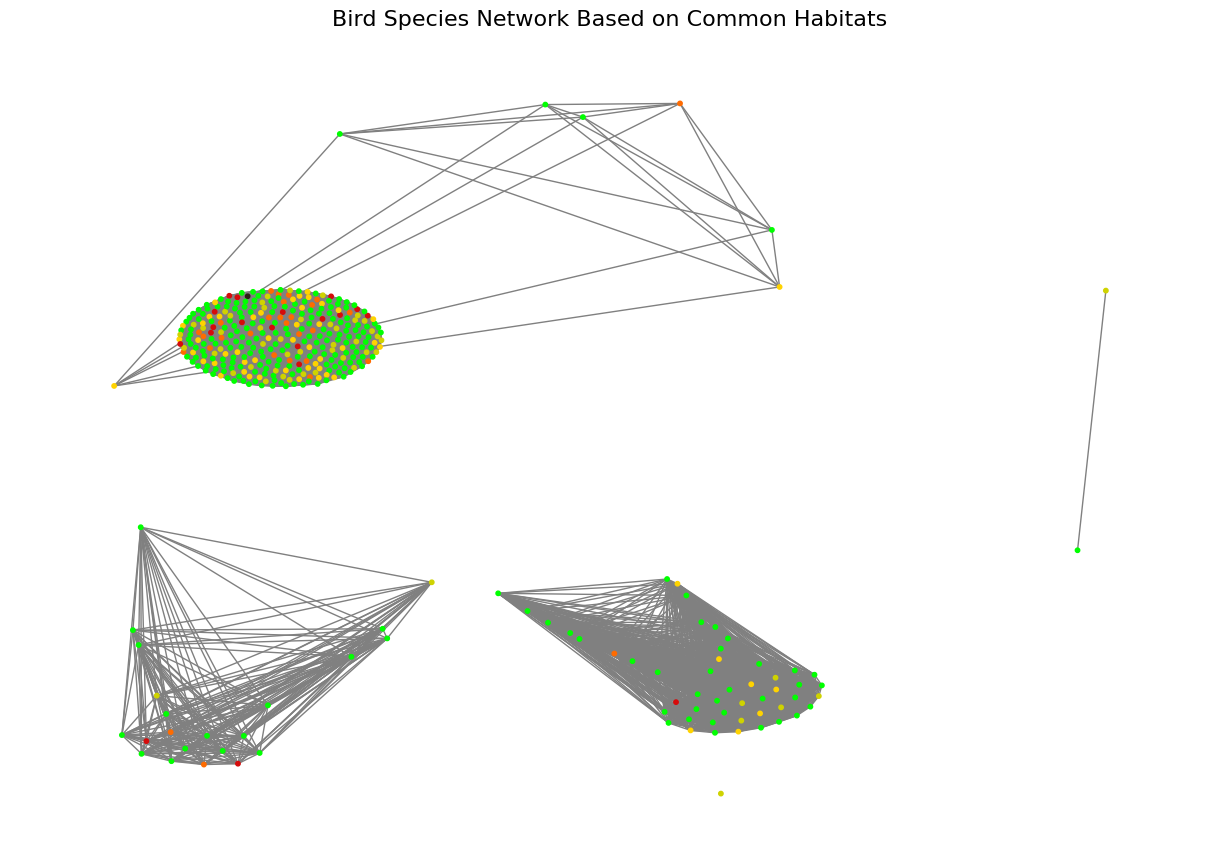

In [33]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Filter relevant columns and convert latitude/longitude to numeric
columns_needed = ['scientificName', 'Habitat', 'redlistCategory']
network_data = df[columns_needed].dropna()

# Drop rows with NaN values after conversion
network_data = network_data.dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Initialize graph
G = nx.Graph()

# Add nodes for each bird with color based on extinction status
for _, row in network_data.iterrows():
    G.add_node(row['scientificName'], color=colors[row['redlistCategory']])

# Add edges based on geographic proximity (difference in latitude and longitude < 10)
for i, row1 in network_data.iterrows():
    for j, row2 in network_data.iterrows():
        if i < j:  # Avoid duplicate comparisons and self-loops
            if row1['Habitat'] == row2['Habitat']:
                G.add_edge(row1['scientificName'], row2['scientificName'])

# Visualize the network
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
pos = nx.spring_layout(G, k=0.8, iterations=100)  # Compute layout for visualization

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', font_size=10, font_weight='bold', node_size=10)
plt.title("Bird Species Network Based on Common Habitats", fontsize=16)
plt.show()

In [34]:
categories = {
    'Trade': ['trade'],
    'Habitat Loss': ['habitat', 'loss', 'forest', 'areas'],
    'Climate Change': ['cyclones', 'natural', 'climate'],
    'Diseases': ['avian', 'malaria'],
    'Predation': ['predators'],
    'Human Activity': ['hunting', 'logging', 'agriculture'],
    'Pollution': ['pollution'],
}


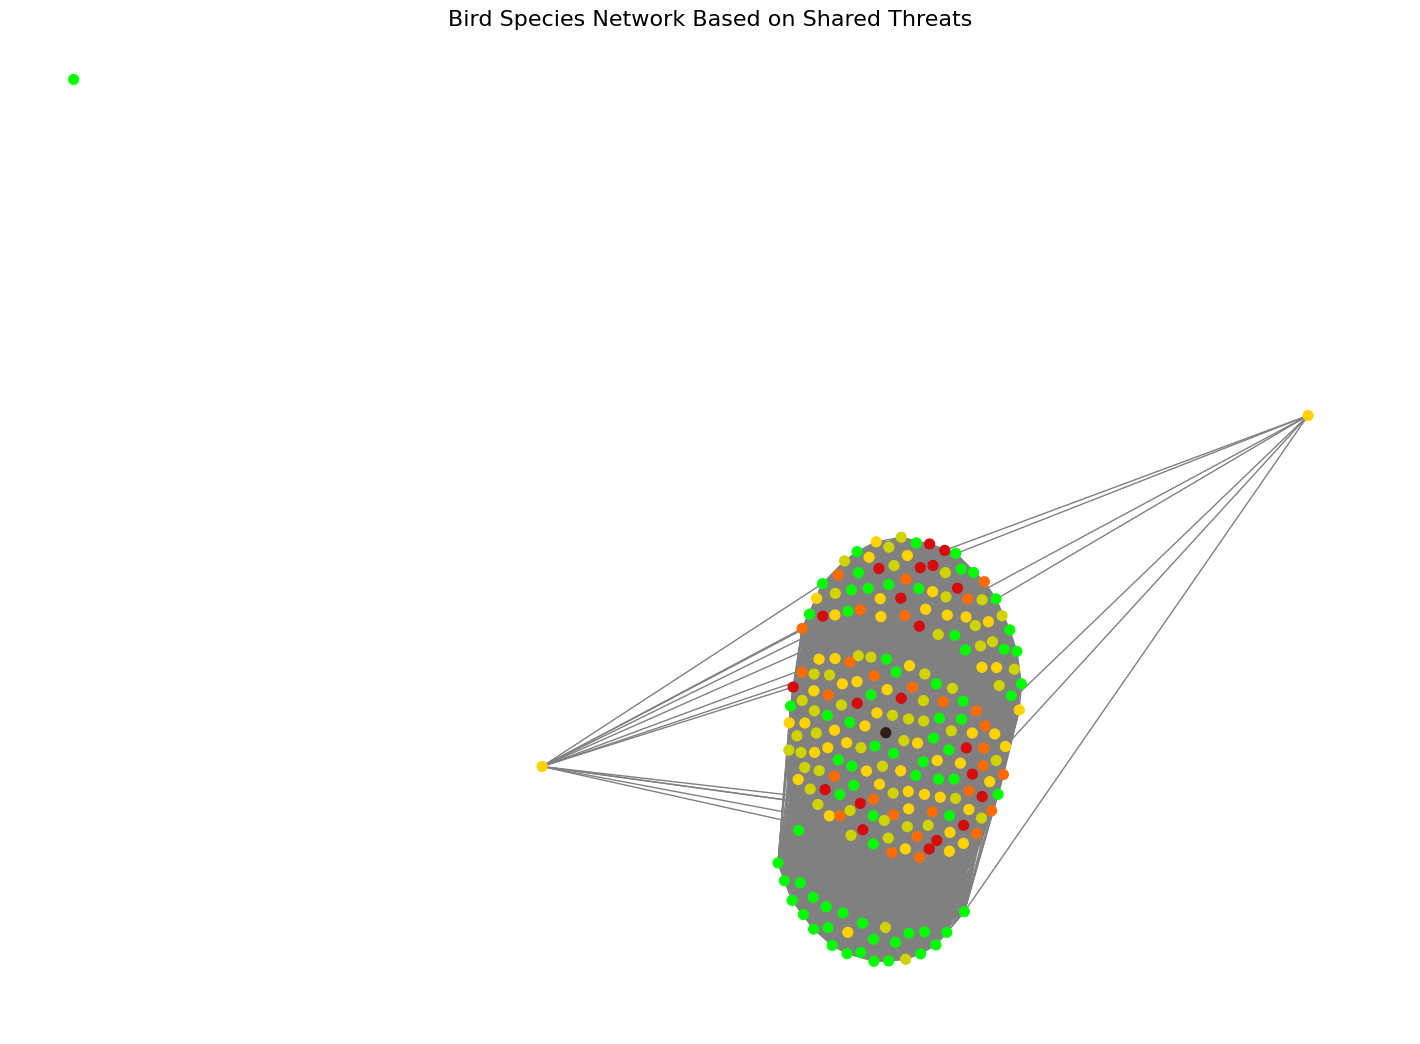

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Filter relevant columns and convert extinction status to color-coded categories
columns_needed = ['scientificName', 'threats', 'redlistCategory']
network_data = df[columns_needed].dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Initialize the graph
G = nx.Graph()

def categorize_threat(threat, category_keywords):
    return any(keyword in threat.lower() for keyword in category_keywords)

# Add nodes for each bird with color based on extinction status
for _, row in network_data.iterrows():
    G.add_node(row['scientificName'], color=colors[row['redlistCategory']])

# Add edges if two birds share at least one common threat
for i, row1 in network_data.iterrows():
    for j, row2 in network_data.iterrows():
        if i < j:  # Avoid duplicate comparisons and self-loops
            threats1 = set()
            for category, keywords in categories.items():
                if categorize_threat(row1['threats'], keywords):
                    threats1.add(category)

            threats2 = set()
            for category, keywords in categories.items():
                if categorize_threat(row2['threats'], keywords):
                    threats2.add(category)
            # Check if there is at least one common threat
            common_threats = threats1.intersection(threats2)
            if common_threats:
                G.add_edge(row1['scientificName'], row2['scientificName'])


# Visualize the network
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
pos = nx.spring_layout(G, k=0.8, iterations=100)  # Compute layout for visualization

plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', font_size=10, font_weight='bold', node_size=50)
plt.title("Bird Species Network Based on Shared Threats", fontsize=16)
plt.show()


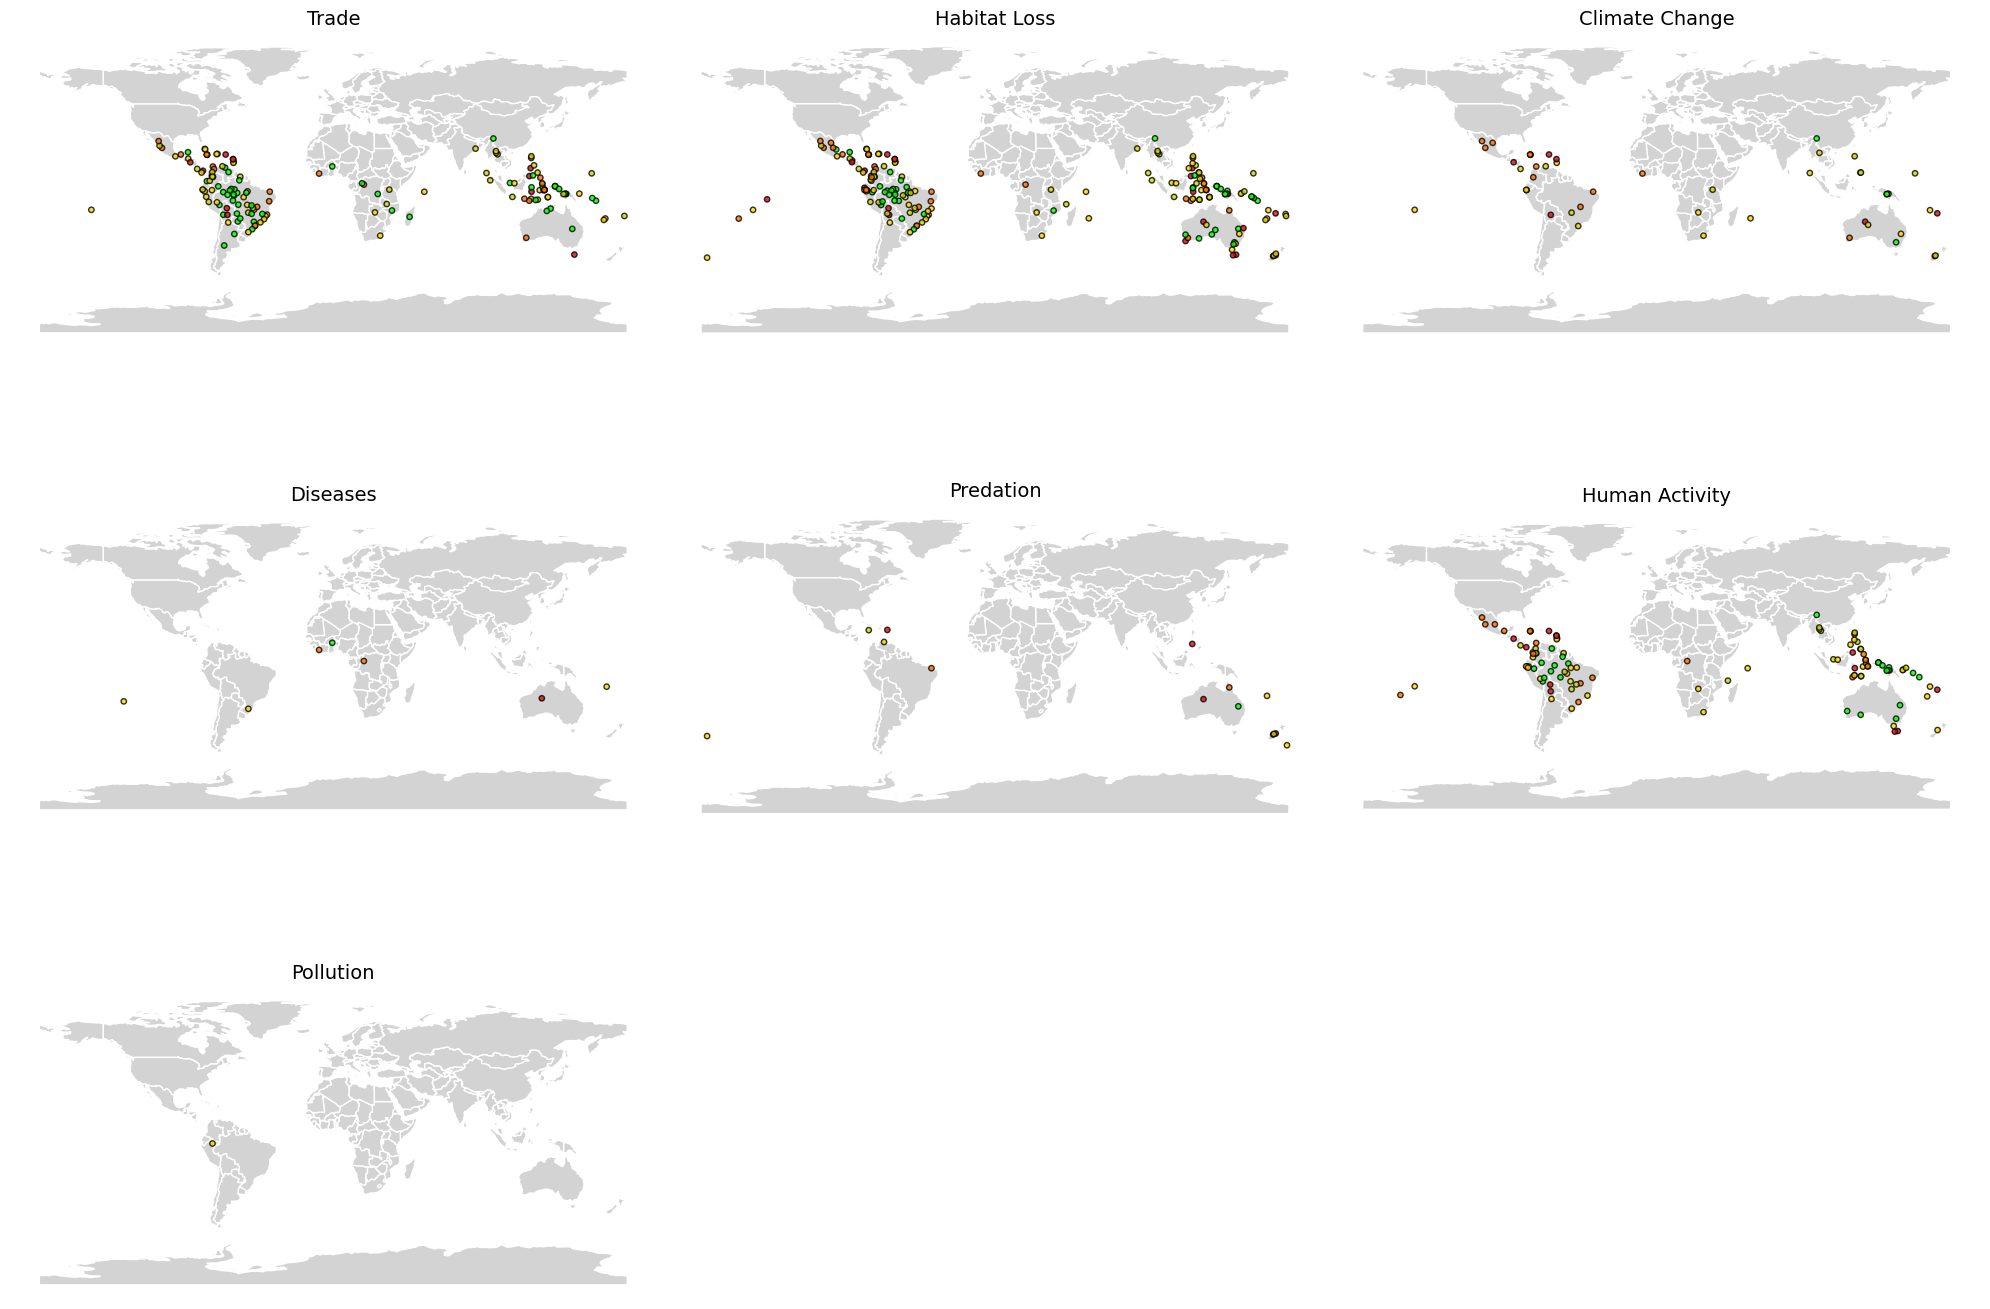

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Define the categorize_threat function
def categorize_threat(threat, category_keywords):
    return any(keyword in threat.lower() for keyword in category_keywords)

# Categories and their keywords
categories = {
    'Trade': ['trade'],
    'Habitat Loss': ['habitat', 'loss', 'forest', 'areas'],
    'Climate Change': ['cyclones', 'natural', 'climate'],
    'Diseases': ['avian', 'malaria'],
    'Predation': ['predators'],
    'Human Activity': ['hunting', 'logging', 'agriculture'],
    'Pollution': ['pollution'],
}

# Replace with the location of your shapefile
world_shapefile_path = "./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Load the world shapefile
world = gpd.read_file(world_shapefile_path)

# Sample dataframe (replace with your data)
# df = pd.read_csv('your_data.csv')

# Filter relevant columns for the map
columns_needed = ['scientificName', 'Centroid.Latitude', 'Centroid.Longitude', 'redlistCategory', 'threats']
map_data = df[columns_needed].dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Assign colors based on 'redlistCategory'
map_data['color'] = map_data['redlistCategory'].map(colors)

# Initialize plot
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for i, (category, keywords) in enumerate(categories.items()):
    # Filter data based on threats
    category_data = map_data[map_data['threats'].apply(lambda x: categorize_threat(x, keywords))]

    # Create a GeoDataFrame
    gdf = gpd.GeoDataFrame(
        category_data, 
        geometry=gpd.points_from_xy(category_data['Centroid.Longitude'], category_data['Centroid.Latitude']),
        crs="EPSG:4326"
    )

    # Plot the world map
    ax = axes[i]
    world.plot(ax=ax, color='lightgrey', edgecolor='white')

    # Plot the category data
    gdf.plot(ax=ax, color=gdf['color'], markersize=15, edgecolor='black', alpha=0.8)

    # Add title
    ax.set_title(f"{category}", fontsize=14)
    ax.axis('off')

# Remove unused subplots
for j in range(len(categories), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

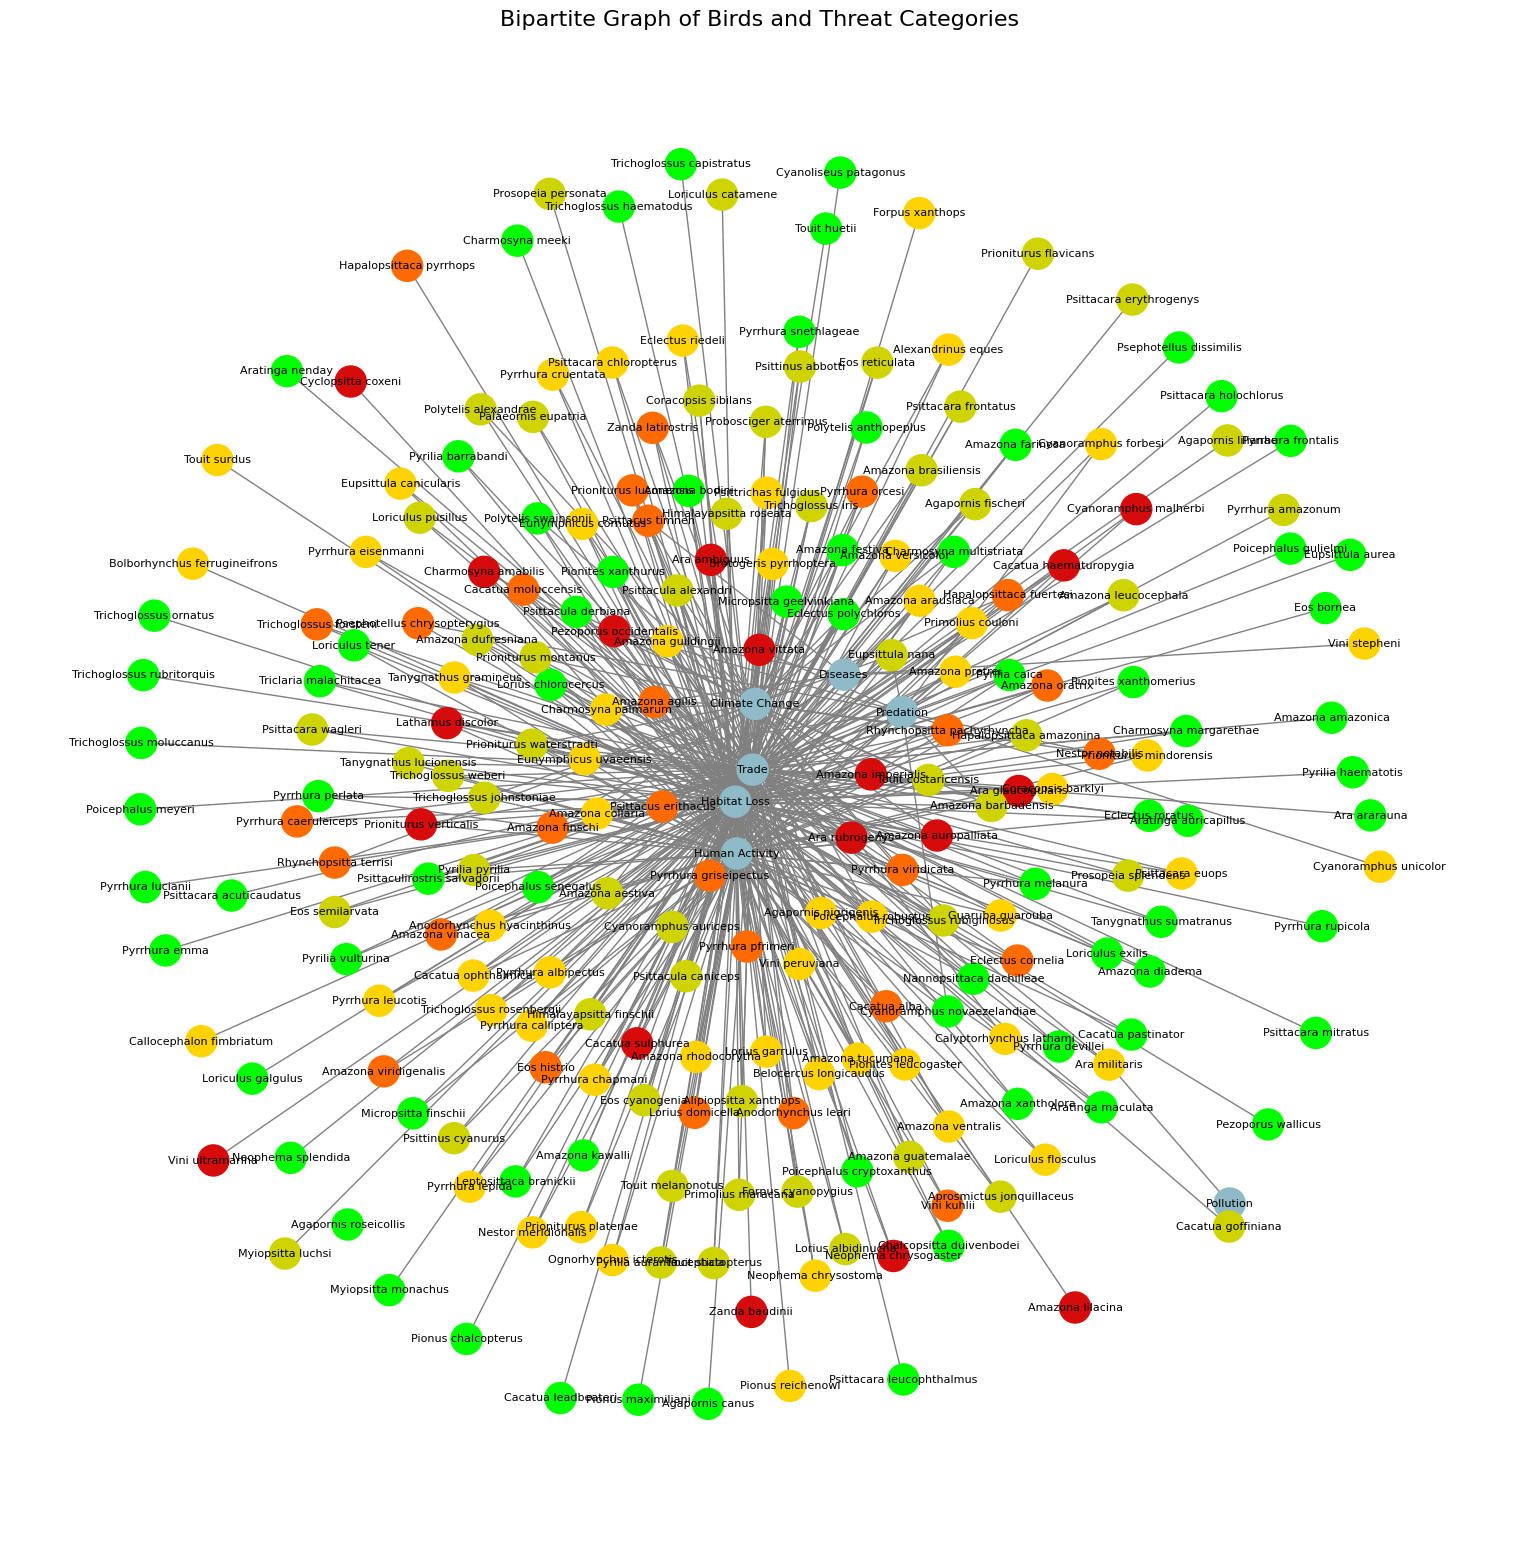

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

# Define the categorize_threat function
def categorize_threat(threat, category_keywords):
    return any(keyword in threat.lower() for keyword in category_keywords)

# Categories and their keywords
categories = {
    'Trade': ['trade'],
    'Habitat Loss': ['habitat', 'loss', 'forest', 'areas'],
    'Climate Change': ['cyclones', 'natural', 'climate'],
    'Diseases': ['avian', 'malaria'],
    'Predation': ['predators'],
    'Human Activity': ['hunting', 'logging', 'agriculture'],
    'Pollution': ['pollution'],
}

# Replace with the location of your shapefile
world_shapefile_path = "./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Load the world shapefile
world = gpd.read_file(world_shapefile_path)

# Sample dataframe (replace with your data)
# df = pd.read_csv('your_data.csv')

# Filter relevant columns for the map
columns_needed = ['scientificName', 'Centroid.Latitude', 'Centroid.Longitude', 'redlistCategory', 'threats']
map_data = df[columns_needed].dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Assign colors based on 'redlistCategory'
map_data['color'] = map_data['redlistCategory'].map(colors)

# Build a bipartite graph
B = nx.Graph()

# Add category nodes
for category in categories:
    B.add_node(category, bipartite=1, color='#8FBAC8')  # Threat category nodes

# Add bird nodes and edges
for _, row in map_data.iterrows():
    species = row['scientificName']
    threats = row['threats'].split(',')  # Assuming threats are comma-separated
    species_color = row['color']

    B.add_node(species, bipartite=0, color=species_color)  # Add bird node

    for category, keywords in categories.items():
        if any(categorize_threat(threat, keywords) for threat in threats):
            B.add_edge(species, category)  # Add edge if the threat matches the category

# Plot the bipartite graph
pos = nx.spring_layout(B, k=0.5, seed=42)
plt.figure(figsize=(15, 15))

# Extract node colors
node_colors = [data['color'] for _, data in B.nodes(data=True)]

nx.draw(
    B, pos,
    with_labels=True,
    node_color=node_colors,
    node_size=500,
    edge_color='grey',
    font_size=8
)
plt.title("Bipartite Graph of Birds and Threat Categories", fontsize=16)
plt.show()

Top 5 nodes by degree centrality:
Habitat Loss: 0.8398268398268398
Trade: 0.6666666666666666
Human Activity: 0.4805194805194805
Climate Change: 0.19913419913419914
Predation: 0.06060606060606061

Top 5 nodes by betweenness centrality:
Habitat Loss: 0.5541003419118532
Trade: 0.36099180862907393
Human Activity: 0.11306300818243849
Climate Change: 0.01847986945587719
Predation: 0.010293345120003355

Detected communities:
Community 1: ['Agapornis canus', 'Agapornis lilianae', 'Amazona amazonica', 'Amazona diadema', 'Amazona farinosa', 'Amazona guatemalae', 'Amazona kawalli', 'Amazona leucocephala', 'Amazona ventralis', 'Amazona xantholora', 'Ara ararauna', 'Aratinga auricapillus', 'Aratinga nenday', 'Charmosyna margarethae', 'Cyanoliseus patagonus', 'Eclectus riedeli', 'Eos bornea', 'Eos reticulata', 'Eos semilarvata', 'Eupsittula aurea', 'Eupsittula canicularis', 'Forpus cyanopygius', 'Forpus xanthops', 'Loriculus exilis', 'Loriculus galgulus', 'Loriculus pusillus', 'Lorius garrulus', 'My

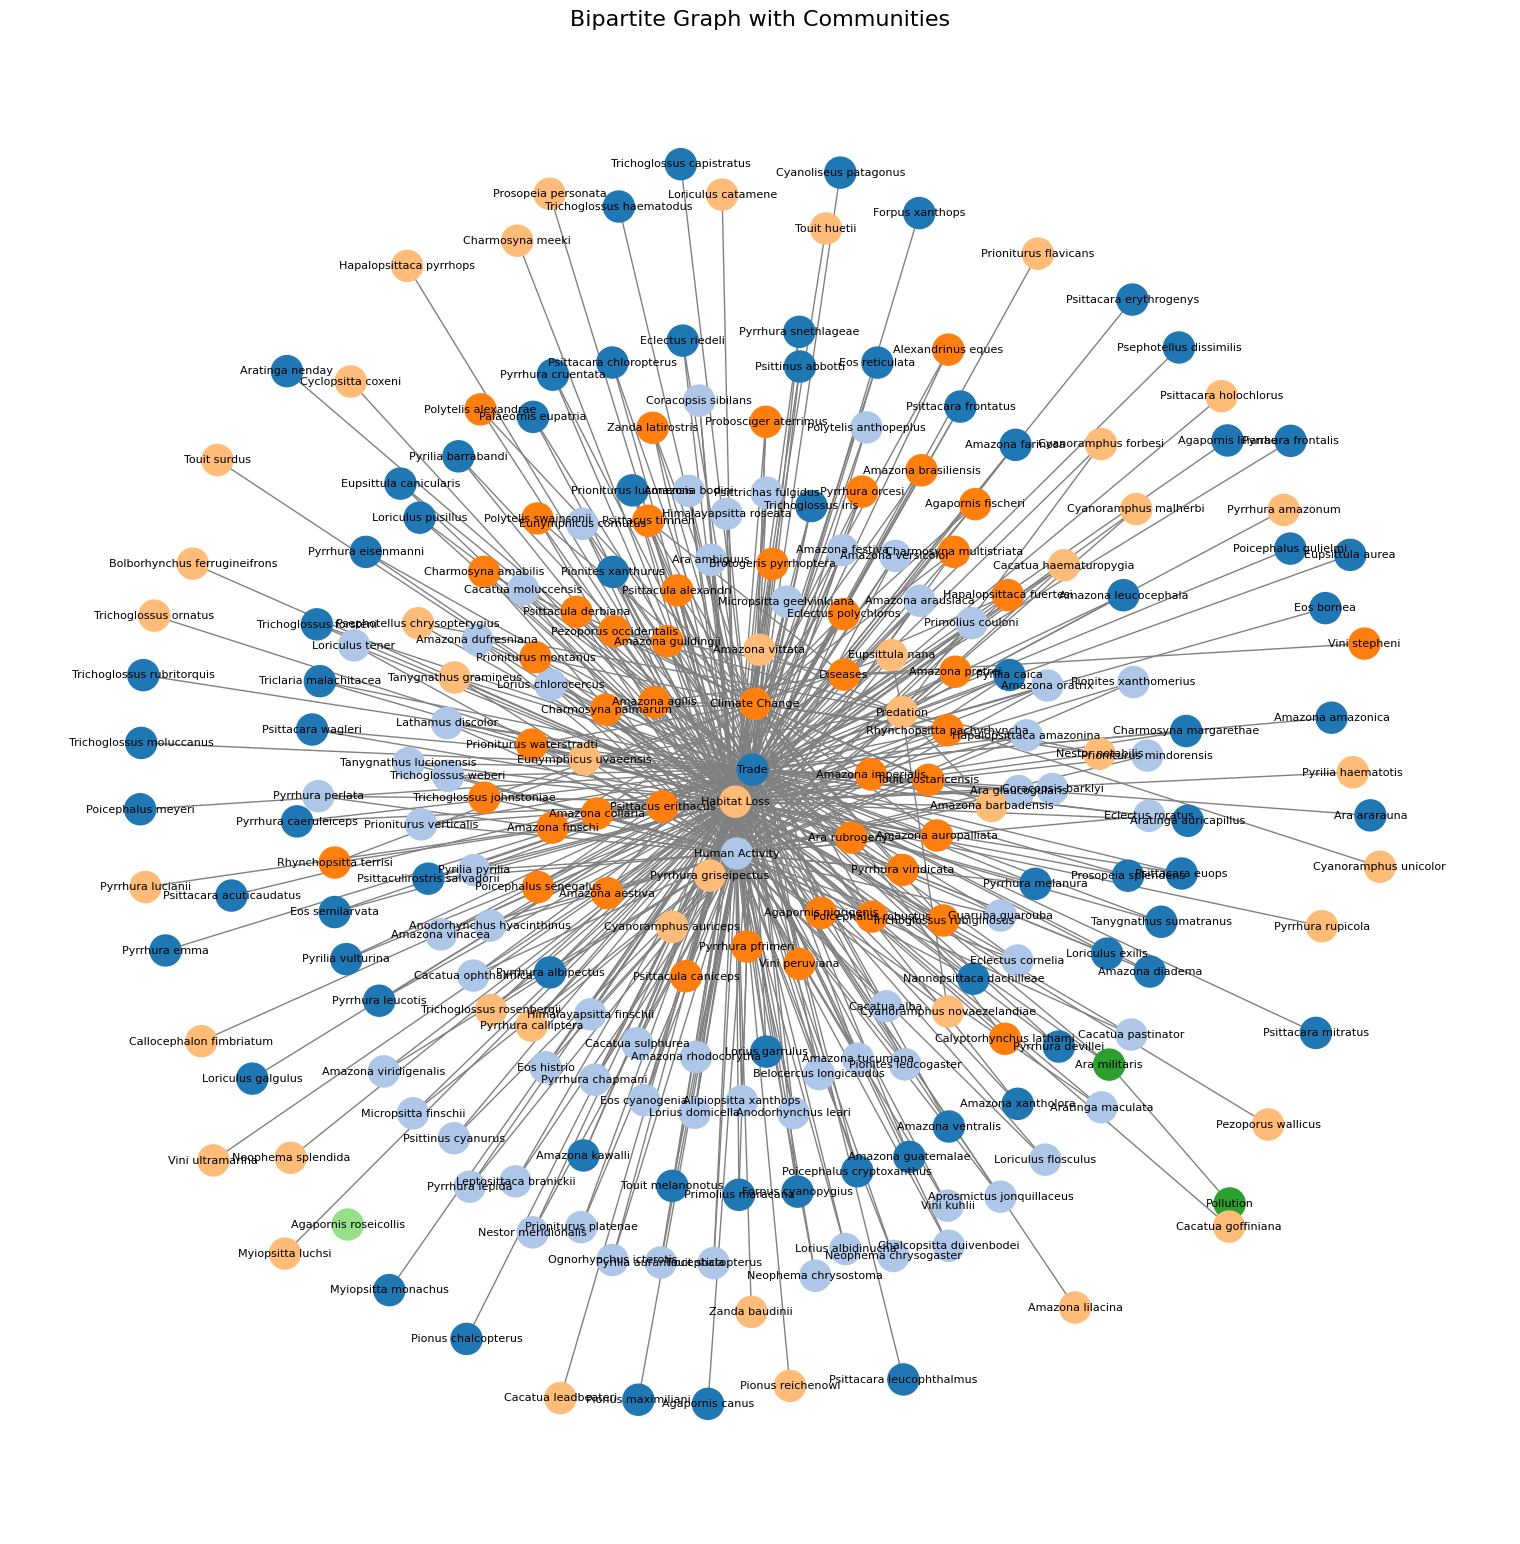

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.algorithms import community

# Define the categorize_threat function
def categorize_threat(threat, category_keywords):
    return any(keyword in threat.lower() for keyword in category_keywords)

# Categories and their keywords
categories = {
    'Trade': ['trade'],
    'Habitat Loss': ['habitat', 'loss', 'forest', 'areas'],
    'Climate Change': ['cyclones', 'natural', 'climate'],
    'Diseases': ['avian', 'malaria'],
    'Predation': ['predators'],
    'Human Activity': ['hunting', 'logging', 'agriculture'],
    'Pollution': ['pollution'],
}

# Replace with the location of your shapefile
world_shapefile_path = "./ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Load the world shapefile
world = gpd.read_file(world_shapefile_path)

# Sample dataframe (replace with your data)
# df = pd.read_csv('your_data.csv')

# Filter relevant columns for the map
columns_needed = ['scientificName', 'Centroid.Latitude', 'Centroid.Longitude', 'redlistCategory', 'threats']
map_data = df[columns_needed].dropna()

# Define colors for extinction status
colors = {
    'Least Concern': '#00FF00',        
    'Vulnerable': '#FFD300',          
    'Near Threatened': '#CFD300',
    'Endangered': '#FF6B00',          
    'Critically Endangered': '#D60B0B',
    'Extinct in the Wild': '#2D1F15',  
    'Extinct': '#000000',              
}

# Assign colors based on 'redlistCategory'
map_data['color'] = map_data['redlistCategory'].map(colors)

# Build a bipartite graph
B = nx.Graph()

# Add category nodes
for category in categories:
    B.add_node(category, bipartite=1, color='#8FBAC8')  # Threat category nodes

# Add bird nodes and edges
for _, row in map_data.iterrows():
    species = row['scientificName']
    threats = row['threats'].split(',')  # Assuming threats are comma-separated
    species_color = row['color']

    B.add_node(species, bipartite=0, color=species_color)  # Add bird node

    for category, keywords in categories.items():
        if any(categorize_threat(threat, keywords) for threat in threats):
            B.add_edge(species, category)  # Add edge if the threat matches the category

# Calculate centrality measures
degree_centrality = nx.degree_centrality(B)
betweenness_centrality = nx.betweenness_centrality(B)

# Print top influential nodes by degree centrality
print("Top 5 nodes by degree centrality:")
for node, centrality in sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:5]:
    print(f"{node}: {centrality}")

# Print top influential nodes by betweenness centrality
print("\nTop 5 nodes by betweenness centrality:")
for node, centrality in sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:5]:
    print(f"{node}: {centrality}")

# Detect communities using the Louvain method or greedy modularity (as an example, greedy modularity here)
communities = community.greedy_modularity_communities(B)

# Print communities
print("\nDetected communities:")
for i, comm in enumerate(communities):
    print(f"Community {i+1}: {sorted(comm)}")

# Assign colors to communities for visualization
community_colors = plt.cm.tab20(range(len(communities)))
community_mapping = {node: i for i, comm in enumerate(communities) for node in comm}
node_colors = [community_colors[community_mapping[node]] if node in community_mapping else '#CCCCCC' for node in B.nodes]

# Plot the bipartite graph with communities
pos = nx.spring_layout(B, k=0.5, seed=42)
plt.figure(figsize=(15, 15))
nx.draw(
    B, pos,
    with_labels=True,
    node_color=node_colors,
    node_size=500,
    edge_color='grey',
    font_size=8
)
plt.title("Bipartite Graph with Communities", fontsize=16)
plt.show()

Centrality Measures:
degree_centrality to identify nodes with the most direct connections.
betweenness_centrality to identify nodes that serve as bridges in the network.
Community Detection:
Communities are identified using the greedy modularity algorithm, which clusters nodes based on their connections.
Detected communities are printed and visually differentiated using unique colors in the graph visualization.

In [39]:
import networkx as nx
import json

def graphml_to_json_custom(graphml_path, json_path, threat_categories):
    """
    Convert GraphML to custom JSON format with separate node and edge lists
    and add a 'threat' category based on predefined keywords.
    """
    def categorize_threat(threat, category_keywords):
        return next((category for category, keywords in category_keywords.items()
                     if any(keyword in threat.lower() for keyword in keywords)), 'Unknown')

    # Read the GraphML file
    G = nx.read_graphml(graphml_path)

    # Create custom format
    graph_data = {
        'nodes': [],
        'edges': []
    }

    # Add nodes with attributes
    for node, attrs in G.nodes(data=True):
        node_data = {'id': node}
        node_data.update(attrs)
        # Add threat category if threat information exists
        if 'threat' in attrs:
            node_data['threat_category'] = categorize_threat(attrs['threat'], threat_categories)
        graph_data['nodes'].append(node_data)

    # Add edges with attributes
    for source, target, attrs in G.edges(data=True):
        edge_data = {
            'source': source,
            'target': target
        }
        edge_data.update(attrs)
        # Add threat category if threat information exists
        if 'threat' in attrs:
            edge_data['threat_category'] = categorize_threat(attrs['threat'], threat_categories)
        graph_data['edges'].append(edge_data)

    # Save to file
    with open(json_path, 'w') as f:
        json.dump(graph_data, f, indent=2)

    print(f"Nodes: {len(graph_data['nodes'])}")
    print(f"Edges: {len(graph_data['edges'])}")
    return graph_data

# Example usage
categories = {
    'Trade': ['trade'],
    'Habitat Loss': ['habitat', 'loss', 'forest', 'areas'],
    'Climate Change': ['cyclones', 'natural', 'climate'],
    'Diseases': ['avian', 'malaria'],
    'Predation': ['predators'],
    'Human Activity': ['hunting', 'logging', 'agriculture'],
    'Pollution': ['pollution'],
}

# Replace with actual paths
graphml_path = './morphology/morphological_parrot_network.graphml'
json_path = 'output.json'

# Generate JSON with threat categorization
graphml_to_json_custom(graphml_path, json_path, categories)


FileNotFoundError: [Errno 2] No such file or directory: './morphology/morphological_parrot_network.graphml'